In [261]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [5]:
filelocation="data/"
filename="201603.as-rel-geo.txt"

filepath=filelocation+filename

In [200]:
edge_list = pd.read_csv(filepath, sep='|', usecols=[0,1], header=None, names=["source", "target"])

# edge_list.describe()
# edge_list.head

print(edge_list.iloc[:5])

   source  target
0       2      34
1       2    9122
2       2   26216
3       2   37628
4       2   45433


In [201]:
# test_list = edge_list.head(1000)
# G = nx.from_pandas_edgelist(test_list)
# nx.draw(G)

In [249]:
G = nx.from_pandas_edgelist(edge_list)

graph_nodes = G.__len__()
graph_edges = G.size()

# Number of nodes
print("Number of nodes in graph: \n\t", graph_nodes)
# Number of edges
print("Number of edges in graph: \n\t", graph_edges)

Number of nodes in graph: 
	 13174
Number of edges in graph: 
	 310738


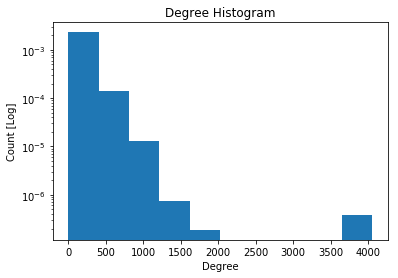

In [254]:
degrees = list(dict(G.degree()).values())

plt.title("Degree Histogram")
plt.ylabel("Count [Log]")
plt.xlabel("Degree")
plt.hist(degrees, density=True, log=True)
plt.show()

In [204]:
# Show 10 highest degrees
sorted(degrees)[::-1][:10]

[4056, 3733, 1707, 1465, 1364, 1250, 1242, 1215, 1191, 1184]

In [252]:
# # Select where the degree is highest
# # index_highest_degree = int(np.argwhere(degrees==np.max(degrees))[0])
# name_highest_sourcedegree = edge_list['source'].value_counts()[:1].index[0]


# # Show n highest out-degree nodes
# node_sample_size = 500
# test = [edge_list['source'].value_counts()[n:].index[0] for n in range(0,node_sample_size)]
# # print(test)

# # edge_list.loc[edge_list['source'] == name_highest_sourcedegree]
# size_subgraph = edge_list.loc[edge_list['source'].isin(test)].shape

# print(size_subgraph[0]/graph_edges)

0.7078439070857121


In [269]:
node_sample_sizes = [10, 50, 100, 500, 1000, 2500]
frac_list = []

for s in node_sample_sizes:
    degree_loc = [edge_list['source'].value_counts()[n:].index[0] for n in range(0,s)]
    size_subgraph = edge_list.loc[edge_list['source'].isin(degree_loc)].shape[0]
    fraction = size_subgraph / graph_edges
    frac_list.append(fraction)

In [270]:
print(frac_list)

[0.051651230296906075, 0.14880059728774722, 0.2464713037993422, 0.7078439070857121, 0.9569283447792031, 0.9941140124477856]


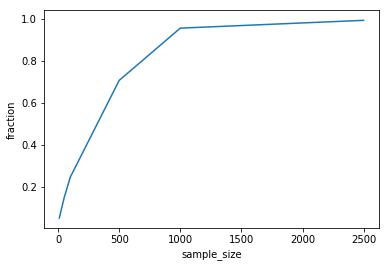

In [271]:
df_frac = pd.DataFrame(list(zip(node_sample_sizes, frac_list)),columns=['sample_size','fraction'])
ax = sns.lineplot(x="sample_size", y="fraction", data=df_frac)